In [ ]:
from scipy.signal import convolve2d

import numpy as np

import matplotlib as matlib

In [ ]:
# Getting Convoluded signal based on live neighbors count
def count_neighbors(current_gen):
  neighbors = np.array([[1,1,1],[1,0,1],[1,1,1]])
  c = convolve2d(current_gen, neighbors, mode='same', boundary="wrap")
  return c


# Rescale and flatten to map the live cells of new geneartion with color map
# Note: Rescaling by 8 as there are maximum of 8 neighbors in 2d grid 
def update_colors(new_gen):
    counts = count_neighbors(new_gen)
    colors = [matlib.cm.spring(neighbors) for neighbors in (counts/8).flatten()]
    colors = ["green" if z1 else z2 
    for z1, z2 in zip(new_gen.flatten(), colors)]
    return colors

# Applying Game of Life Rules by using output of Convoluded signal
# - fewer than two live neighbours dies,by underpopulation.
# - more than three live neighbours dies, by overpopulation.
# - current live cells w counts 2 or 3 lives.
# Note: marked by false for cells to die based on conditional operator

def get_updates(current_gen):

  counts = count_neighbors(current_gen)
  
  under = counts >= 2 
  over = counts <= 3  
  life = current_gen * under * over 
  new_gen = np.where(counts==3, True, life)  # Reproduce

  colors = update_colors(new_gen)
  return new_gen, colors


In [ ]:
loc = [241, 242, 243, 244, 245, 246, 247, 248]

def game_board(n,*board):
  X = fig.add_subplot(loc[n]) 
  X.set_title("gen"+str(n))
  X.get_xaxis().set_visible(False) 
  X.get_yaxis().set_visible(False)
  scatter = X.scatter(*board, animated=True, s=20, edgecolor="white")
  return scatter

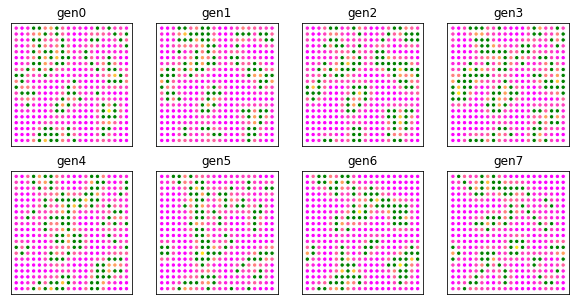

In [ ]:
# 2d Cellular Automata based on Conway's Game of Life Rules
# Visualization of N generations on a square grid game-board
# New generation is a 'Convolude' with signals of neighboring life 
# Game of Life generations are shown as a scatter plot on the 2d game-board

N = 8
init_livecells_percent = 0.5
gridD = 20

seed = np.random.uniform(0, 1, size=(gridD,gridD)) <= init_livecells_percent
xs = np.arange(0, gridD); ys = np.arange(0, gridD)
board = np.meshgrid(xs, ys)

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 5)) # contains total four grids in two rows
scatter = [None] * N
for i in range( N ):
  scatter[i] = game_board(i,*board)

import warnings
warnings. filterwarnings("ignore") 

# A new scatter plot updates the next game-board with new life 
for i in range( N ):
  seed, color = get_updates(seed)
  scatter[i].set_facecolor(color)